## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 185s 16us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [8]:
print(X_train[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

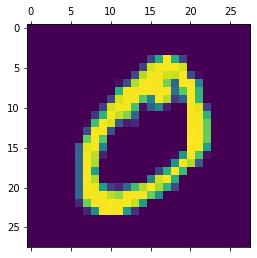

In [9]:
plt.matshow(X_train[1])

## Scaling data

In [10]:
X_train = X_train / 255
X_test = X_test / 255

In [11]:
X_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Building CNN

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 1ms/step - loss: 0.2748 - accuracy: 0.9212
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1252 - accuracy: 0.9635
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0880 - accuracy: 0.9736
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0664 - accuracy: 0.9798: 0s - loss: 0.0665 - ac
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0533 - accuracy: 0.9836
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0429 - accuracy: 0.9869
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0345 - accuracy: 0.9898
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0286 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0232 - accuracy: 0.9930: 0s - loss: 0.0230 - accuracy: 0.
Epoch 10/10
1875/1875 [=

In [13]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 825us/step - loss: 0.0846 - accuracy: 0.9749


[0.08461298793554306, 0.9749000072479248]

Text(69.0, 0.5, 'Truth')

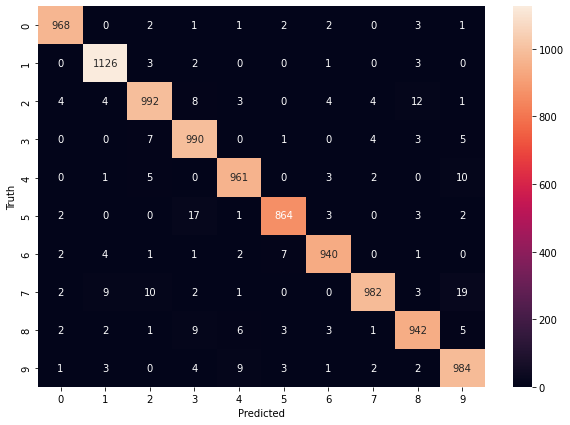

In [16]:
import seaborn as sn
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Single prediction

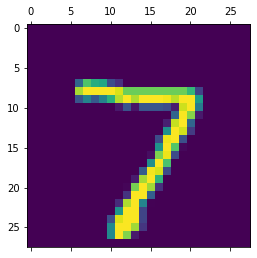

In [17]:
plt.matshow(X_test[0])

In [18]:
np.argmax(y_predicted[0])

7